# 데이터 탐색 (EDA)

In [1]:
# 라이브러리
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 데이터 불러오기
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')

In [3]:
# 데이터 미리보기
# 데이터는 "id", "qid1", "qid2", "question1", "question2", "is_duplicate" 열로 구성되어 있다.
# "id"는 각 행 데이터의 고유한 인덱스 값이다.
# "qid1" 과 "qid2" 는 각 질문들의 고유한 인덱스 값이다.
# "question1" 과 "question2" 는 각 질문의 내용을 담고 있다.
# "is_duplicate" 는 0 또는 1을 값으로 가지는데, 0 이면 두 개의 질문이 중복이 아니고 1이면 두 개의 질문이 중복이라는 것을 의미한다.
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
# 데이터 크기 확인
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')
        
# 데이터 크기를 보면 일반적인 데이터와는 다른 양상을 보여준다. 대부분 train 데이터가 test 데이터보다 크기가 큰데
# 이번 데이터는 test 데이터가 train 데이터보다 5배 더 크다.
# 그 이유는 쿼라의 경우 질문에 대해 데이터 수가 적다면 각각을 검색을 통해 중복을 찾아내는 편법을 사용할 수 있는데,
# 이를 방지하기 위해 쿼라에서 직접 컴퓨터가 만든 질문 쌍을 평가 데이터에 임의적으로 추가했기 때문이다.
# 따라서 평가 데이터가 크지만 실제 질문 데이터에는 얼마 되지 않는다.
# 캐글의 경우 평가를 할 때 컴퓨터가 만든 질문은 예측 점수에 포함되지 않는다.

파일 크기 : 
sample_submission.csv         22.35MB
test.csv                      314.02MB
train.csv                     63.4MB


In [5]:
# 전체 학습 데이터의 개수
print('전체 학습데이터의 개수: {:,}'.format(len(train_data)))

# 결과를 보면 질문 쌍의 개수는 40만 갣. 판다스는 데이터 프레임과 시리즈 구조를 가지고 있다.
# 데이터프레임이 행렬 구조라면 시리즈는 인덱스를 가지고 있는 배열이다.
# 지금 하나의 데이터에 두 개의 질문이 있는 구조인데, 전체 질문(두 개의 질문)을 한 번에 분석하기 위해 판다스의 시리즈를 통해
# 두 개의 질문을 하나로 합친다.

전체 학습데이터의 개수: 404,290


In [6]:
# 질문 데이터를 시리즈로 변환
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

# 각 질문을 리스트로 만든 뒤 하나의 시리즈 데이터 타입으로 만든다.
# 기존 데이터에서 질문 쌍의 개수가 40만개 정도이고 각각 질문이 두 개이므로 대략 80만 개 정도의 질문이 있다.

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [7]:
# 질문들의 중복 여부 확인하기
print('Train 데이터의 총 질문 수: {:,}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {:,}'.format(np.sum(train_set.value_counts() > 1)))

# 중복을 제거한 유일한 질문값만 확인하기 위해 넘파이의 unique 함수를 사용
# 중복되는 질문의 정확한 개수를 확인하기 위해 2개 이상의 값을 가지는 질문인 value_counts가 2 이상인 값의 개수를 모두 더했다.
# 결과를 보면 80만 개 중에서 약 53만 개가 유니크 데이터이므로 27만 개가 중복되어 있음을 알 수 있고,
# 27만 개의 데이터는 11만 개의 데이터의 고유한 질문으로 이루어져 있음을 알 수 있다.

Train 데이터의 총 질문 수: 537,361
반복해서 나타나는 질문의 수: 111,873


Text(0, 0.5, 'Number of questions')

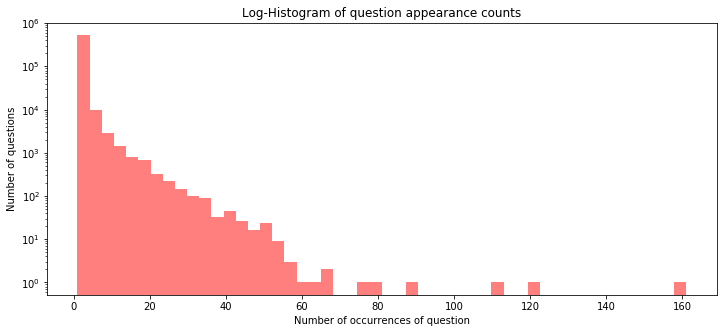

In [8]:
# 히스토그램은 "question" 값들의 개수를 보여주며 y축의 크기 범위를 줄이기 위해 log값으로 크기를 줄인다.
# x값은 중복 개수이며, y값은 동일한 중복 횟수를 가진 질문의 개수를 의미한다.

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Log-Histogram of question appearance counts')
# 그래프 x 축 라벨
plt.xlabel('Number of occurrences of question')
# 그래프 y 축 라벨
plt.ylabel('Number of questions')

# 그래프를 보면 우선 중복 횟수가 1인 질문들, 즉 유일한 질문이 가장 많고 대부분의 질문이 중복 횟수가 50번 이하다.
# 매우 큰 빈도를 가진 질문들은 이상값의 후보들이다.

In [9]:
# 질문 중혹 횟수의 통계량
print('중복 최대 개수: {}'.format(np.max(train_set.value_counts())))
print('중복 최소 개수: {}'.format(np.min(train_set.value_counts())))
print('중복 평균 개수: {:.2f}'.format(np.mean(train_set.value_counts())))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 중간길이: {}'.format(np.median(train_set.value_counts())))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 25)))
print('제 3 사분위 중복: {}'.format(np.percentile(train_set.value_counts(), 75)))

# 중복이 가장 많이 된 경우는 161번이고, 평균 문장당 1.5개의 중복을 가지며, 표준편차는 1.9이다.
# 평균이 1.5라는 것은 많은 데이터가 최소 1개 이상 중복되어 있음을 의미한다.

중복 최대 개수: 161
중복 최소 개수: 1
중복 평균 개수: 1.50
중복 표준편차: 1.91
중복 중간길이: 1.0
제 1 사분위 중복: 1.0
제 3 사분위 중복: 1.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2e2b923ff60>,
 'caps': [<matplotlib.lines.Line2D at 0x2e2b980e630>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e2b923fe10>],
 'medians': [<matplotlib.lines.Line2D at 0x2e2b980ecc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e2b97fb358>],
 'means': [<matplotlib.lines.Line2D at 0x2e2b97fb048>]}

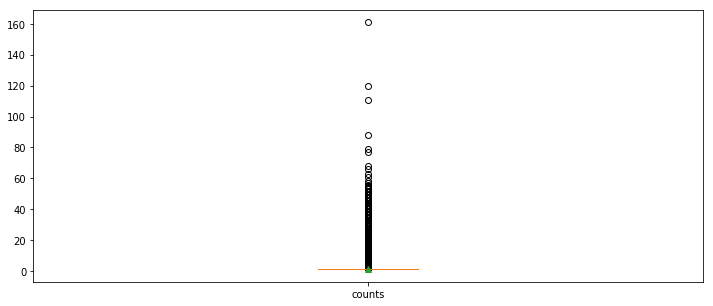

In [10]:
# 중복횟수에 대한 박스 플랏
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([train_set.value_counts()],
             labels=['counts'],
             showmeans=True)

# 박스플랏을 보면 이상값이 너무 많아 데이터를 정확하게 보기 어렵다.

(-0.5, 799.5, 599.5, -0.5)

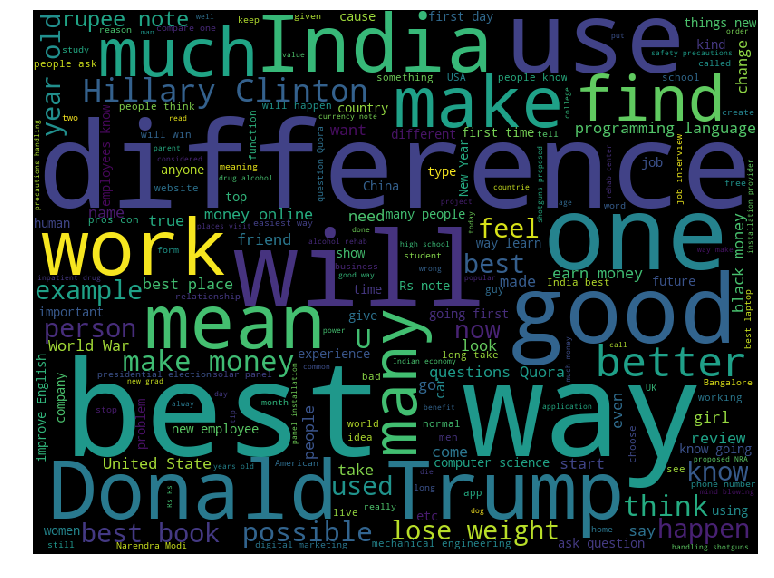

In [11]:
# 질문에 포함된 단어들에 대한 워드클라우드
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

# 워드클라우드를 보면 best, way, one, good 등이 많이 쓰였지만 특이하게 Donald Trump 라는 단어도 많이 쓰인 것으로 나타났다.
# 그 이유는 이 데이터를 수집한 기간이 선거철이라 나타난 현상으로 보여진다.

is duplicate가 0 인 개수 : 255,027
is duplicate가 1 인 개수 : 149,263


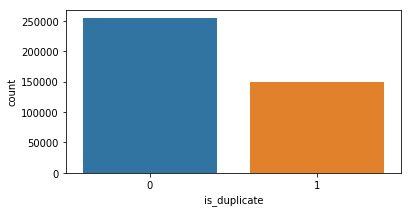

In [12]:
# 라벨에 대한 빈도 그래프
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_data['is_duplicate'])

# 0인 데이터가 약 25만개로 1인 데이터보다 조금 더 많다.
# 이런 불균형은 학습이 원활하게 되지 않을 수도 있다.
# 많은 데이터를 제거하거나 적은 데이터를 늘리는 방법 등으로 데이터의 균형을 맞춰줄 필요도 있다.
print('is duplicate가 0 인 개수 : {:,}'.format(np.sum(train_data["is_duplicate"] == 0)))
print('is duplicate가 1 인 개수 : {:,}'.format(np.sum(train_data["is_duplicate"] == 1)))

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Probability')

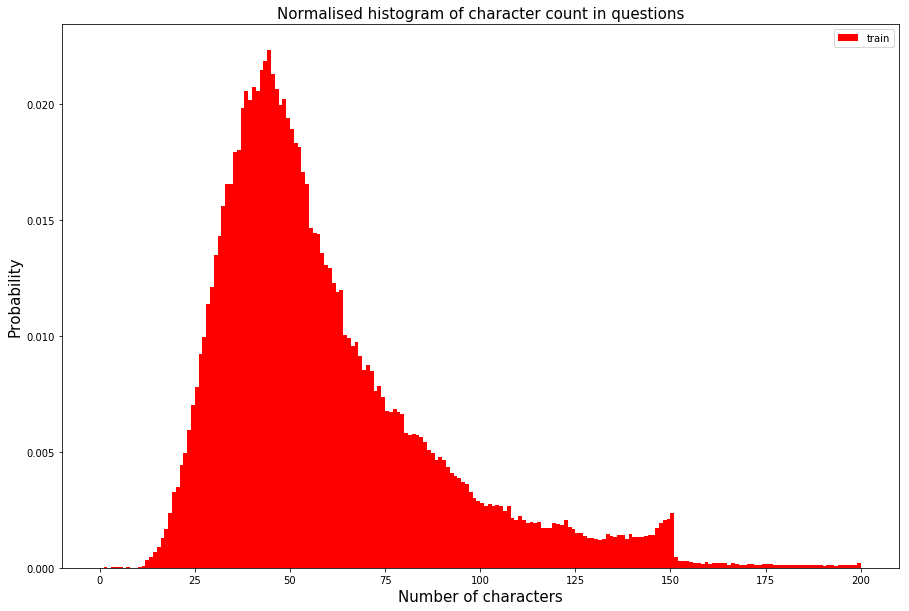

In [13]:
# 각 데이터에 담긴 길이에 대한 히스토그램

# 각 데이터의 길이
train_length = train_set.apply(len)

# 히스토그램
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0,200], facecolor='r', normed=True, label='train')
plt.title("Normalised histogram of character count in questions", fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

# 질문의 길이는 대부분 15 ~ 150 사이에 모여 있으며 150 이후부터는 급격하게 줄어드는 것으로 보아 
# quora의 글자수 제한이 150으로 보여진다.

In [14]:
# 각 질문의 길이에 대한 통계량 값
print('질문 길이 최대 값: {}'.format(np.max(train_length)))
print('질문 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('질문 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('질문 길이 중간 값: {}'.format(np.median(train_length)))
print('질문 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('질문 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

# 평균 길이는 60정도이고, 중간값의 경우 51로 나타났다.
# 이는 이상값이 많아 평균을 9정도 높인 것으로 나타났다.
# 따라서 이런 데이터의 경우 이상값을 제거하고 학습하는 것이 바람직 하다.

질문 길이 최대 값: 1169
질문 길이 평균 값: 59.82
질문 길이 표준편차: 31.96
질문 길이 중간 값: 51.0
질문 길이 제 1 사분위: 39.0
질문 길이 제 3 사분위: 72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2e2d2177128>,
 'caps': [<matplotlib.lines.Line2D at 0x2e2d21777b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e2d21aff98>],
 'medians': [<matplotlib.lines.Line2D at 0x2e2d2177e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e2d21a34e0>],
 'means': [<matplotlib.lines.Line2D at 0x2e2d21a31d0>]}

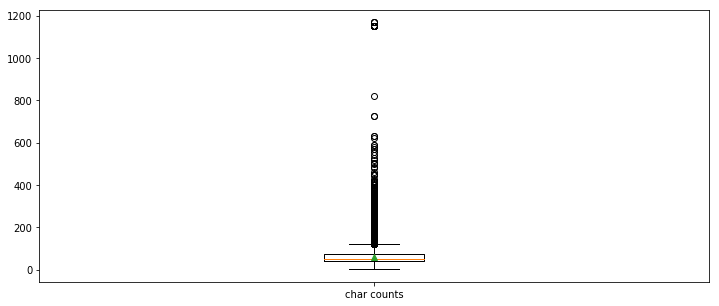

In [15]:
# 각 질문의 길이에 대한 박스플랏
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['char counts'], showmeans=True)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Prabability')

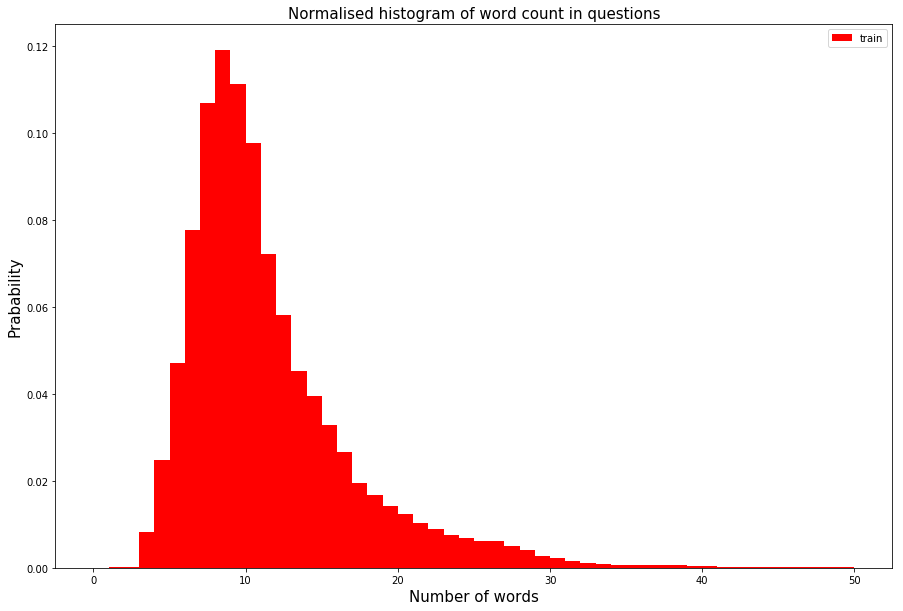

In [16]:
# 각 질문에 포함된 단어의 개수에 따른 히스토그램

# 각 질문에 포함된 단어의 개수
train_word_counts = train_set.apply(lambda x:len(x.split(' ')))

# 각 질문에 포함된 단어의 히스토그램
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50], facecolor='r', normed=True, label='train')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Prabability', fontsize=15)

# 그래프를 보면 대부분 10개 정도의 단어로 구성된 데이터가 가장 많고, 20개 이상은 극히 드물다는 것을 알 수 있다.

In [17]:
# 각 질문의 단어의 개수에 대한 통계량 값
print('질문 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('질문 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('질문 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('질문 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('질문 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('질문 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))
print('질문 단어 개수 99 퍼센트: {}'.format(np.percentile(train_word_counts, 99)))

# 질문에 포함된 단어 개수는 평균 11.06개 였으며 중간값의 경우 평균보다 1개 적은 10개로 나타났다.
# 가장 많이 포함된 단어의 개수는 237개였다.

질문 단어 개수 최대 값: 237
질문 단어 개수 평균 값: 11.06
질문 단어 개수 표준편차: 5.89
질문 단어 개수 중간 값: 10.0
질문 단어 개수 제 1 사분위: 7.0
질문 단어 개수 제 3 사분위: 13.0
질문 단어 개수 99 퍼센트: 31.0


{'whiskers': [<matplotlib.lines.Line2D at 0x2e2d1c65908>,
 'caps': [<matplotlib.lines.Line2D at 0x2e2d1c37518>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e2d1c65748>],
 'medians': [<matplotlib.lines.Line2D at 0x2e2d1c37400>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e2d1c3c0b8>],
 'means': [<matplotlib.lines.Line2D at 0x2e2d1c37c18>]}

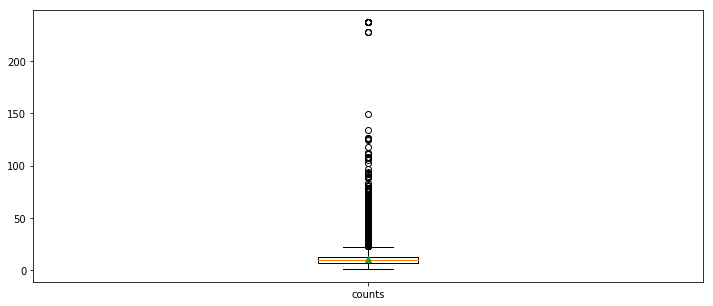

In [18]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_word_counts, labels=['counts'], showmeans=True)

# 질문의 개수, 질문의 길이, 질문에 사용된 단어의 개수의 모든 박스플랏에서 이상치가 많은 것으로 나타났다.

In [19]:
# 문장의 구성 요소에 따른 질문 개수
qmarks = np.mean(train_set.apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
math = np.mean(train_set.apply(lambda x: '[math]' in x)) # []
fullstop = np.mean(train_set.apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('수학 태그가있는 질문: {:.2f}%'.format(math * 100))
print('질문이 가득 찼을 때: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

# 결과를 보면 대부분의 질문이 물음표를 가지고 있고, 첫 글자가 대문자로 시작하는 질문들이였다.
# 이런 보편적인 특징은 전처리 과정에서 제거해주는 것이 좋다.

물음표가있는 질문: 99.87%
수학 태그가있는 질문: 0.12%
질문이 가득 찼을 때: 6.31%
첫 글자가 대문자 인 질문: 99.81%
대문자가있는 질문: 99.95%
숫자가있는 질문: 11.83%


# 데이터 전처리

In [20]:
# 라이브러리
import pandas as pd
import numpy as np
import re
import json
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [21]:
# 데이터 경로 지정
DATA_IN_PATH = './data_in/'

# Train 데이터 불러오기
train_data = pd.read_csv(DATA_IN_PATH + 'train.csv', encoding='utf-8')

In [22]:
# 중복인 데이터와 중복이 아닌 데이터로 분리
train_pos_data = train_data.loc[train_data['is_duplicate'] == 1]
train_neg_data = train_data.loc[train_data['is_duplicate'] == 0]

# 중복이 아닌 데이터가 더 많이 때문에 데이터의 개수가 비슷하도록 중복이 아닌 데이터의 개수를 줄인다.
class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))

# 중복인 데이터에서 랜덤으로 추출한다.
train_neg_data = train_neg_data.sample(frac = sample_frac)

In [23]:
# 중복인 질문과 중복이 아닌 질문의 개수가 같아졌다.
print("중복 질문 개수: {:,}".format(len(train_pos_data)))
print("중복이 아닌 질문 개수: {:,}".format(len(train_neg_data)))

중복 질문 개수: 149,263
중복이 아닌 질문 개수: 149,263


In [24]:
# 데이터를 다시 합친다.
train_data = pd.concat([train_neg_data, train_pos_data])

In [25]:
# 질문 쌍을 하나의 질문 리스트로 만들고
# 정규 표현식ㅇ르 사용해 물음표와 마침표 같은 구두점 및 기호를 제거하고
# 모든 문자를 소문자로 바꾼다.

# 물음표와 마침표와 같은 기호에 대해 정규표현식으로 전처리하기 위해 re 라이브러리를 활용한다.
# 먼저 정규 표현식을 사용할 패턴 객체를 만든다. re.compile 함수를 사용해 패턴 객체를 만든다.
# 이 때 함수 인자에는 내가 찾고자 하는 문자열 패턴에 대한 내용을 입력한다.
FILTERS = "([~.,!?\"':;)(])"
change_filter = re.compile(FILTERS)

# question1과 question2의 내용중에서 문자열만 빼낸다.
questions1 = [str(s) for s in train_data['question1']]
questions2 = [str(s) for s in train_data['question2']]

# 전처리한 데이터를 저장할 공간을 만든다.
filtered_questions1 = list()
filtered_questions2 = list()

# 특수문자 필터를 거친다음 모든 문자를 소문자로 변환한다.
for q in questions1:
     filtered_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in questions2:
     filtered_questions2.append(re.sub(change_filter, "", q).lower())

In [27]:
# 토크나이징
# 토크나이징 객체를 만들 때는 두 질문 텍스트를 합친 리스트에 대해 적용하고, 토크나이징은 각 질문에 대해 따로 진행한다.

# 토크나이징 객체 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(filtered_questions1 + filtered_questions2)

# 각 문장에 토크나이징 적용
questions1_sequence = tokenizer.texts_to_sequences(filtered_questions1)
questions2_sequence = tokenizer.texts_to_sequences(filtered_questions2)

In [28]:
# 패딩
# 패딩은 모델에 적용하기 위해 특정 길이로 동일하게 맞추는 작업이다
# 최대 길이를 지정하고, 그 길이보다 긴 질문은 자르고, 짧은 질문은 부족한 부분을 0으로 채우는 과정이다.
# 최대 길이는 31로 지정했는데 그이유는 단어 개수가 99%인 개수가 31이기 때문이다.
MAX_SEQUENCE_LENGTH = 31
q1_data = pad_sequences(questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
q2_data = pad_sequences(questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [30]:
# 단어사전 만들기
word_vocab = {}
word_vocab = tokenizer.word_index 

# 전처리가 끝난 데이터 확인
labels = np.array(train_data['is_duplicate'], dtype=int)
print('Shape of question1 data: {}'.format(q1_data.shape))
print('Shape of question2 data:{}'.format(q2_data.shape))
print('Shape of label: {}'.format(labels.shape))
print("Words in index: {:,}".format(len(word_vocab)))

# 두 개의 질문 문장의 경우 각각 길이를 31로 지정했고, 단어 사전의 길이인 전체 단어 개수는 76,361개로 나타났다.

Shape of question1 data: (298526, 31)
Shape of question2 data:(298526, 31)
Shape of label: (298526,)
Words in index: 76,361


In [31]:
# 단어사전과 전체 단어의 개수는 딕셔너리로 저장
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)+1

In [33]:
# 전처리가 끝난 데이터 저장하기
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

In [34]:
# Test 데이터 불러오기
test_data = pd.read_csv(DATA_IN_PATH + 'test.csv', encoding='utf-8')
# test_data = test_data.drop(test_data.tail(1217679).index,inplace=True) # drop last n rows
valid_ids = [type(x) ==int for x in test_data.test_id] 
test_data = test_data[valid_ids].drop_duplicates()

In [35]:
# Test 데이터에 대해 똑같은 전처리 작업 적용하기
test_questions1 = [str(s) for s in test_data['question1']]
test_questions2 = [str(s) for s in test_data['question2']]

filtered_test_questions1 = list()
filtered_test_questions2 = list()

for q in test_questions1:
     filtered_test_questions1.append(re.sub(change_filter, "", q).lower())
        
for q in test_questions2:
     filtered_test_questions2.append(re.sub(change_filter, "", q).lower())

In [36]:
# Test 데이터 토크나이징 및 패딩
test_questions1_sequence = tokenizer.texts_to_sequences(filtered_test_questions1)
test_questions2_sequence = tokenizer.texts_to_sequences(filtered_test_questions2)

test_q1_data = pad_sequences(test_questions1_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
test_q2_data = pad_sequences(test_questions2_sequence, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [37]:
# 전처리가 끝난 Test 데이터 확인
test_id = np.array(test_data['test_id'])

print('Shape of question1 data: {}'.format(test_q1_data.shape))
print('Shape of question2 data:{}'.format(test_q2_data.shape))
print('Shape of ids: {}'.format(test_id.shape))

Shape of question1 data: (2345796, 31)
Shape of question2 data:(2345796, 31)
Shape of ids: (2345796,)


In [38]:
# 전처리가 끝난 Test 데이터 저장
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), test_q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), test_q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)